In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt


In [3]:
# 1. Import and preprocess the dataset
df = pd.read_csv('Housing.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [5]:
categorical_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 
                    'airconditioning', 'prefarea', 'furnishingstatus']
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [6]:
df_encoded

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,True,False,False,False,True,True,False,False
1,12250000,8960,4,4,4,3,True,False,False,False,True,False,False,False
2,12250000,9960,3,2,2,2,True,False,True,False,False,True,True,False
3,12215000,7500,4,2,2,3,True,False,True,False,True,True,False,False
4,11410000,7420,4,1,2,2,True,True,True,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,2,True,False,True,False,False,False,False,True
541,1767150,2400,3,1,1,0,False,False,False,False,False,False,True,False
542,1750000,3620,2,1,1,0,True,False,False,False,False,False,False,True
543,1750000,2910,3,1,1,0,False,False,False,False,False,False,False,False


In [7]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   price                            545 non-null    int64
 1   area                             545 non-null    int64
 2   bedrooms                         545 non-null    int64
 3   bathrooms                        545 non-null    int64
 4   stories                          545 non-null    int64
 5   parking                          545 non-null    int64
 6   mainroad_yes                     545 non-null    bool 
 7   guestroom_yes                    545 non-null    bool 
 8   basement_yes                     545 non-null    bool 
 9   hotwaterheating_yes              545 non-null    bool 
 10  airconditioning_yes              545 non-null    bool 
 11  prefarea_yes                     545 non-null    bool 
 12  furnishingstatus_semi-furnished  545 non-null    b

In [8]:
# Define features and target
X = df_encoded.drop('price', axis=1)
y = df_encoded['price']

In [9]:
# Scale numerical features
numerical_cols = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
scaler = StandardScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

In [10]:
# 2. Split data into train-test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# 3. Simple Linear Regression (using 'area' only)
X_train_simple = X_train[['area']]
X_test_simple = X_test[['area']]
simple_model = LinearRegression()
simple_model.fit(X_train_simple, y_train)

LinearRegression()

In [12]:
# Predict and evaluate
y_pred_simple = simple_model.predict(X_test_simple)
mae_simple = mean_absolute_error(y_test, y_pred_simple)
mse_simple = mean_squared_error(y_test, y_pred_simple)
r2_simple = r2_score(y_test, y_pred_simple)

In [13]:
print("Simple Linear Regression (area vs price):")
print(f"MAE: {mae_simple:.2f}")
print(f"MSE: {mse_simple:.2f}")
print(f"R²: {r2_simple:.2f}")

Simple Linear Regression (area vs price):
MAE: 1474748.13
MSE: 3675286604768.19
R²: 0.27


In [14]:
# 4. Multiple Linear Regression (all features)
multi_model = LinearRegression()
multi_model.fit(X_train, y_train)

LinearRegression()

In [15]:
# Predict and evaluate
y_pred_multi = multi_model.predict(X_test)
mae_multi = mean_absolute_error(y_test, y_pred_multi)
mse_multi = mean_squared_error(y_test, y_pred_multi)
r2_multi = r2_score(y_test, y_pred_multi)

In [16]:
print("\nMultiple Linear Regression (all features):")
print(f"MAE: {mae_multi:.2f}")
print(f"MSE: {mse_multi:.2f}")
print(f"R²: {r2_multi:.2f}")


Multiple Linear Regression (all features):
MAE: 970043.40
MSE: 1754318687330.67
R²: 0.65


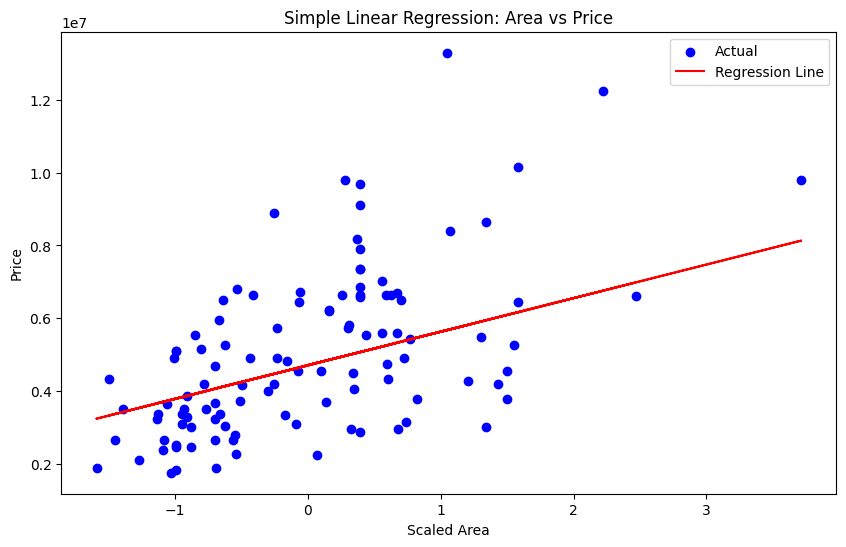

In [17]:
# 5. Plot regression line for simple linear regression
plt.figure(figsize=(10, 6))
plt.scatter(X_test_simple, y_test, color='blue', label='Actual')
plt.plot(X_test_simple, y_pred_simple, color='red', label='Regression Line')
plt.xlabel('Scaled Area')
plt.ylabel('Price')
plt.title('Simple Linear Regression: Area vs Price')
plt.legend()
plt.show()

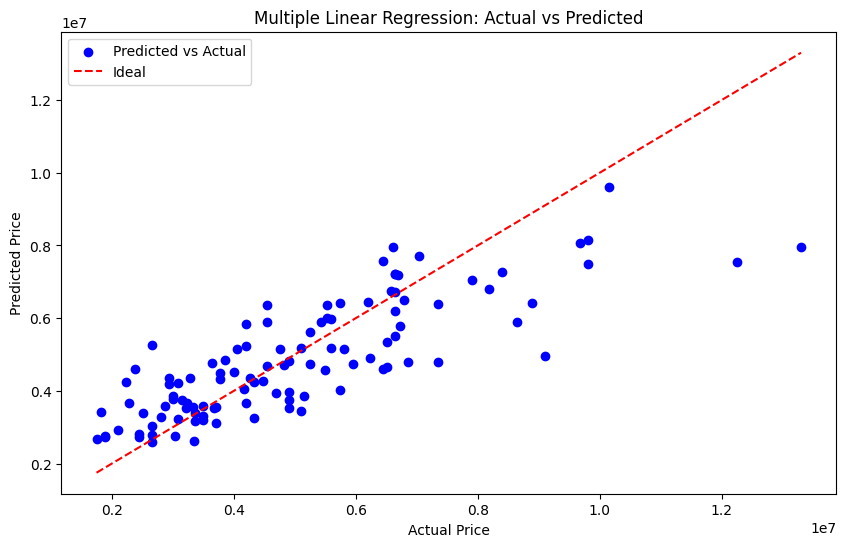

In [18]:
# Plot actual vs predicted for multiple linear regression
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_multi, color='blue', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Ideal')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Multiple Linear Regression: Actual vs Predicted')
plt.legend()
plt.show()

In [20]:
# 6. Interpret coefficients
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': multi_model.coef_
}).sort_values(by='Coefficient', ascending=False)
print("\nMultiple Linear Regression Coefficients:")
print(coef_df)


Multiple Linear Regression Coefficients:
                            Feature    Coefficient
9               airconditioning_yes  791426.735843
8               hotwaterheating_yes  684649.885339
10                     prefarea_yes  629890.565313
2                         bathrooms  549420.501241
0                              area  511615.563777
7                      basement_yes  390251.176181
5                      mainroad_yes  367919.947680
3                           stories  353158.429856
6                     guestroom_yes  231610.037176
4                           parking  193542.781675
1                          bedrooms   56615.572458
11  furnishingstatus_semi-furnished -126881.817585
12     furnishingstatus_unfurnished -413645.062228
